# Primjer drugog kolokvija

In [57]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
import sklearn.datasets as dataset
from sklearn.metrics import accuracy_score, confusion_matrix

def plot_2d_clf_problem(X, y, h=None):
    '''
    Plots a two-dimensional labeled dataset (X,y) and, if function h(x) is given, 
    the decision surfaces.
    '''
    assert X.shape[1] == 2, "Dataset is not two-dimensional"
    if h!=None : 
        # Create a mesh to plot in
        r = 0.04  # mesh resolution
        x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
        y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
        xx, yy = np.meshgrid(np.arange(x_min, x_max, r),
                             np.arange(y_min, y_max, r))
        XX=np.c_[xx.ravel(), yy.ravel()]
        try:
            Z_test = h(XX)
            if Z_test.shape == ():
                # h returns a scalar when applied to a matrix; map explicitly
                Z = np.array(list(map(h,XX)))
            else :
                Z = Z_test
        except ValueError:
            # can't apply to a matrix; map explicitly
            Z = np.array(list(map(h,XX)))
        # Put the result into a color plot
        Z = Z.reshape(xx.shape)
        plt.contourf(xx, yy, Z, cmap=plt.cm.Pastel1)

    # Plot the dataset
    plt.scatter(X[:,0],X[:,1], c=y, cmap=plt.cm.tab20b, marker='o', s=50);

### 1. zadatak
Na temelju zadanih $X$ i $y$ naučite dva modela logističke regresije. Prvi neka ima argument konstruktora `fit_intercept` postavljen na `True`, a drugi na `False`. Nemojte koristiti nikakva polinomijalna preslikavanja. **Komentirajte rezultat**

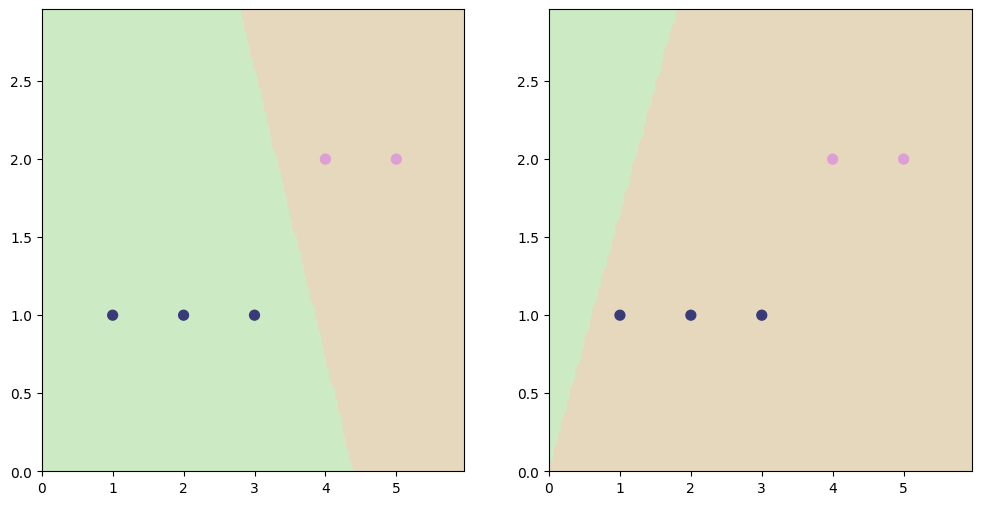

In [63]:
X = np.array([[1,1],[2,1],[3,1],[4,2], [5,2]])
y = np.array([0,0,0,1,1]) 

clf_1 = LogisticRegression(fit_intercept=True)
clf_2 = LogisticRegression(fit_intercept=False)

clf_1.fit(X,y)
clf_2.fit(X,y)


fig = plt.figure(figsize=(12,6))

plt.subplot(1,2,1)
plot_2d_clf_problem(X,y, lambda x: clf_1.predict(x) > 0.5)

plt.subplot(1,2,2)
plot_2d_clf_problem(X,y, lambda x: clf_2.predict(x) > 0.5)


### 2. zadatak
Na temelju zadanih $X$ i $y$ naučite model logističke regresije. Komentirajte kvalitetu predikcija (proučite kako je nastao skup $X$).


[[1.12062809 0.02877773]]
0.773109243697479


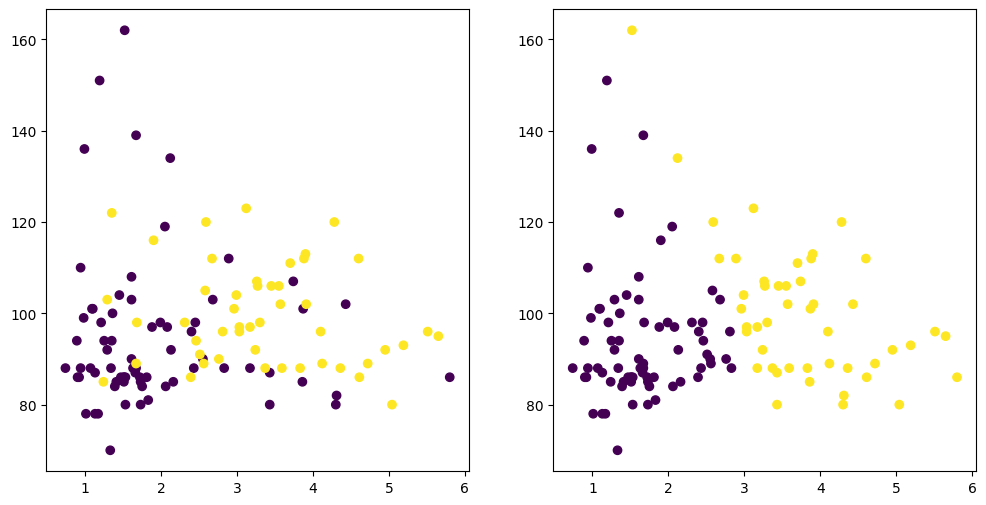

In [81]:
ds = dataset.load_wine()
X_o = ds['data']
y_o = ds['target']

X = X_o[:, [1,4]]
X = X[y_o != 0]
#X = np.vstack((X[y_o != 0][:10], X[y_o != 0][-10:]))
y = y_o[y_o != 0]
#y = np.concatenate((y[:10], y[-10:]))


clf = LogisticRegression(max_iter=3000)
clf.fit(X,y)
print(clf.coef_)
print(clf.score(X,y))
pred = clf.predict(X)

plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.scatter(X[:,0], X[:,1], c=y)

plt.subplot(1,2,2)
plt.scatter(X[:,0], X[:,1], c=pred)



### 3. zadatak
Na temelju zadanih X i y, stvorite skup za učenje i skup za testiranje. Zatim pomoću unakrsne provjere odredite optimalan stupanj polinomijalnog preslikavanja $d$. Nacrtajte graf koji povezuje stupnjeve i preciznost (accuracy) na skupu za učenje i treniranje. Komentirajte rezultat

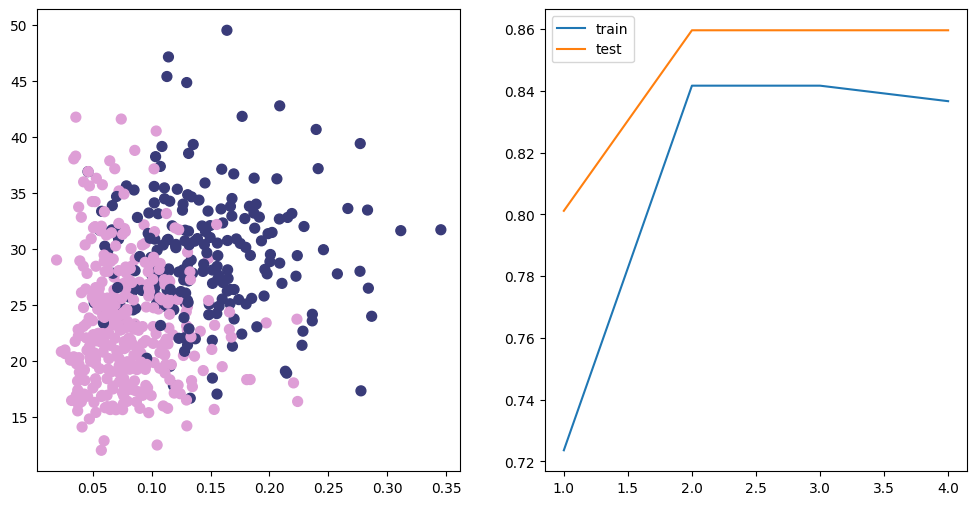

In [122]:
ds = dataset.load_breast_cancer()
X_o = ds['data']
y = ds['target']



X = X_o[:, [5,21]]

x_train, x_test, y_train, y_test = train_test_split(X, y, train_size=0.7)

fig = plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plot_2d_clf_problem(X,y)


ds = [1,2,3,4]
train_accs = []
test_accs = []

for d in ds:
    poly = PolynomialFeatures(degree=d, include_bias=False)
    phi = poly.fit_transform(x_train)

    clf = LogisticRegression(max_iter=1000*d)

    clf.fit(phi, y_train)

    train_accs.append(clf.score(phi, y_train))
    test_accs.append(clf.score(poly.transform(x_test), y_test))

plt.subplot(1,2,2)
plt.plot(ds, train_accs, label='train')
plt.plot(ds, test_accs, label='test')
plt.legend()
plt.show()


### 4. zadatak

Naučite model višeklasne logističke regresije (po izboru) za zadani skup podataka. Ispišite matricu zabune (confusion matrix) i kratko je komentirajte. 

/home/mislav/.local/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


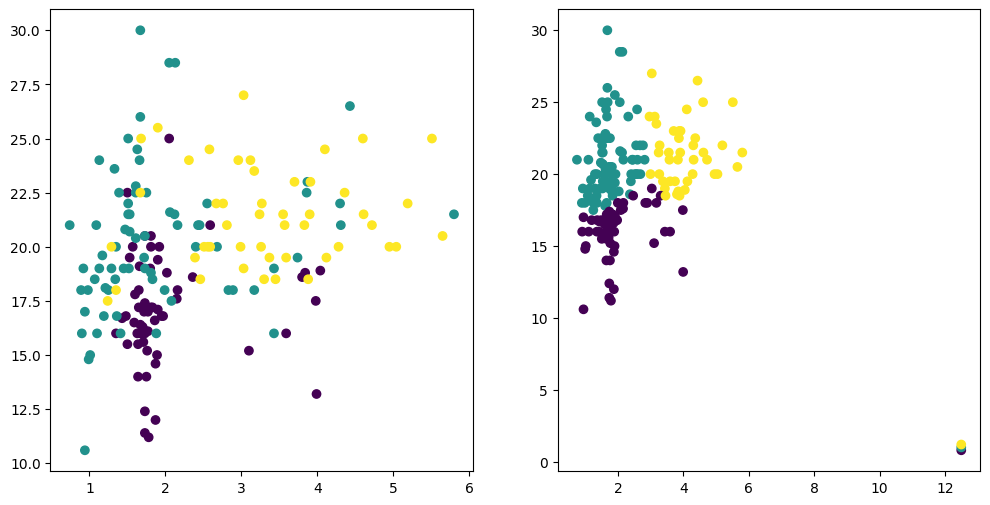

[[40 16  3]
 [16 47  8]
 [ 3 15 30]]


In [125]:
ds = dataset.load_wine()
X_o = ds['data']
y =  ds['target']

X = X_o[:,[1,3]]

fig = plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.scatter(X[:,0], X[:,1], c=y)

clf = LogisticRegression(multi_class='multinomial')

clf.fit(X, y)

pred = clf.predict(X)
plt.subplot(1,2,2)
plt.scatter(X[:,0], X[:,1], c=pred)
plt.scatter([0.8, 1, 1.2], [12.5,12.5,12.5] , c=[0,1,2])

plt.show()

print(confusion_matrix(y, pred))